In [2]:
from typing import TypedDict,Literal
class PortfolioState(TypedDict):
    amount_usd:float
    total_usd:float
    target_currency:Literal['EUR','PKR']
    total:float
# Defines shape of data that moves between langraph nodes

In [4]:
def calc_total(state: PortfolioState)->PortfolioState:
    state['total_usd'] = state['amount_usd'] *  1.08  # Assuming a conversion rate of 1.0 for USD to USD
    return state

def calc_to_pkr(state:PortfolioState)->PortfolioState:
    state['total'] = state['total_usd'] *  283.19  # Assuming a conversion rate of 280 PKR to 1 USD
    return state

def calc_to_eur(state:PortfolioState)->PortfolioState:
    state['total'] = state['total_usd'] *  0.9  # Assuming a conversion rate of 280 PKR to 1 USD
    return state
 
def choose_conversion(state:PortfolioState)->str:
    return state['target_currency']

In [5]:
from langgraph.graph import StateGraph,START,END
# creating a LangGraph flow, and telling it what kind of state it should track and pass between steps.
builder=StateGraph(PortfolioState) 

# we add nodes
builder.add_node("calc_total_node", calc_total)
builder.add_node("calc_to_pkr_node", calc_to_pkr)
builder.add_node("calc_to_eur_node", calc_to_eur)

# we add edges
builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
"calc_total_node",
choose_conversion,
{"PKR":"calc_to_pkr_node",
"EUR":"calc_to_eur_node"}

)
builder.add_edge(["calc_to_pkr_node","calc_to_eur_node"], END)

graph=builder.compile()

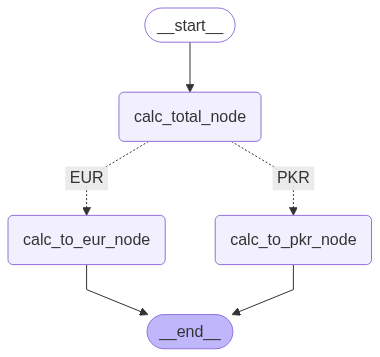

In [6]:
from IPython.display import display,Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
graph.invoke({
    "amount_usd": 1000.0,"target_currency":"EUR"})

{'amount_usd': 1000.0,
 'total_usd': 1080.0,
 'target_currency': 'EUR',
 'total': 972.0}